In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import json
import numpy as np
from tqdm.notebook import tqdm

from _config import CLEANED_CYCLES_JSON_FILE, PROGRAM_PREDICTABILITY_DISTANCE_DATA, PROGRAM_PREDICTABILITY_DISTANCE_DATA_STATS
    
with open(CLEANED_CYCLES_JSON_FILE) as f:
    cycles = json.load(f)

dict = {}

def phase_wise_distance(cycle_1, cycle_2):
    distance = 0
    length = max(len(cycle_1), len(cycle_2))
    for i in range(length):
        if i >= len(cycle_2):
            distance += 1
            continue
        
        if i >= len(cycle_1):
            distance += 1
            continue
        
        if cycle_1[i] != cycle_2[i]:
            distance += 1
            continue
        distance += 0
        
    return distance

total_distances_per_file = {}

for thing, programs in tqdm(cycles.items(), total=len(cycles.keys()), desc="Programs"):
    for program, cycles in programs.items():
        key = f"{thing}_{program}"
        distances = []
        result_counts = []
        for i in range(len(cycles) - 1):
            cycle_1 = cycles[i]
            cycle_2 = cycles[i + 1]
            result_counts.append(len(cycle_1["results"]))
            distance = phase_wise_distance(cycle_1["results"], cycle_2["results"])
            distances.append(distance)
        if len(cycles) > 0:
            result_counts.append(len(cycles[-1]["results"]))
            
        if len(distances) == 0:
            continue
        
        total_distances_per_file[key] = distances
        
        numpy_distances = np.array(distances)
        median_distance = np.median(numpy_distances)
        first_quartile = np.percentile(numpy_distances, 25)
        third_quartile = np.percentile(numpy_distances, 75)
        
        numpy_result_counts = np.array(result_counts)
        median_result_count = np.median(numpy_result_counts)
        first_quartile_result_count = np.percentile(numpy_result_counts, 25)
        third_quartile_result_count = np.percentile(numpy_result_counts, 75)
        
        dict[key] = {
            "median": median_distance,
            "first_quartile": first_quartile,
            "third_quartile": third_quartile,
            "median_relative": median_distance / median_result_count,
            "first_quartile_relative": first_quartile / first_quartile_result_count,
            "third_quartile_relative": third_quartile / third_quartile_result_count,
        }
        
with open(PROGRAM_PREDICTABILITY_DISTANCE_DATA_STATS, 'w') as fp:    
    json.dump(dict, fp)
    
with open(PROGRAM_PREDICTABILITY_DISTANCE_DATA, 'w') as fp:    
    json.dump(total_distances_per_file, fp)

Programs:   0%|          | 0/4345 [00:00<?, ?it/s]

(array([980., 266., 229., 107., 122.,  81., 103.,  44., 113.,  61., 101.,
         79.,  79., 137., 109.,  98.,  92.,  79.,  75.,   7.,  98.,  89.,
         85.,  46.,  55.,  64.,  77.,  14.,  64.,  26.,  63.,  30.,  29.,
         29.,  26.,  19.,  27.,  25.,  24.,   1.,  29.,  18.,  16.,   4.,
         13.,  11.,  13.,   9.,  15.,   6.,  33.,  17.,  20.,  11.,  10.,
         26.,  16.,  30.,   7.,   7.,  11.,  11.,  12.,   1.,   4.,  12.,
         15.,   5.,   7.,   9.,   8.,   5.,  10.,   4.,   8.,   5.,   9.,
          4.,   6.,   3.,   3.,   3.,   6.,   3.,   2.,   3.,   6.,   1.,
          6.,   3.,   6.,   9.,   3.,   2.,   3.,   2.,   0.,   2.,   2.,
          8.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

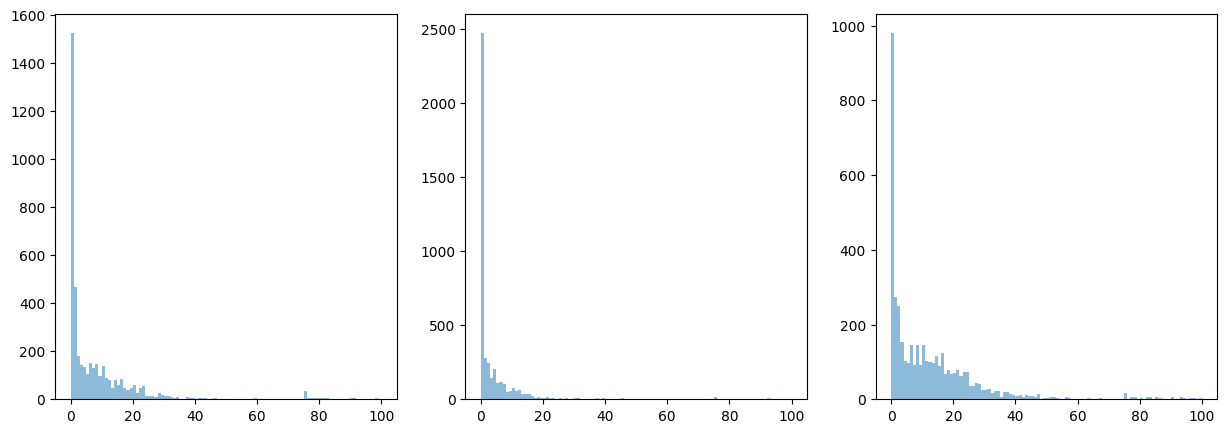

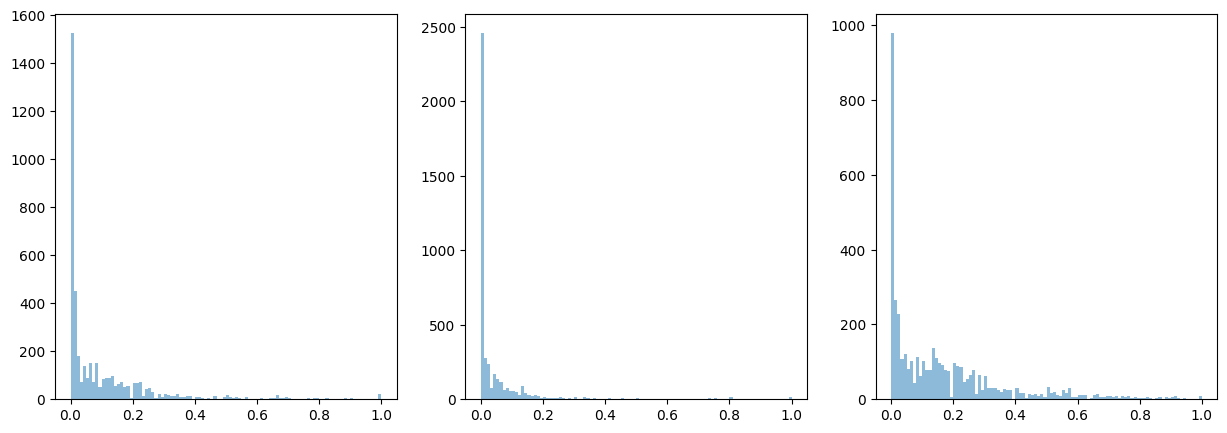

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import json
import matplotlib.pyplot as plt

from _config import PROGRAM_PREDICTABILITY_DISTANCE_DATA_STATS

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

medians = []
first_quartiles = []
third_quartiles = []

with open(PROGRAM_PREDICTABILITY_DISTANCE_DATA_STATS) as f:
    data = json.load(f)
    for key in data:
        medians.append(data[key]['median'])
        first_quartiles.append(data[key]['first_quartile'])
        third_quartiles.append(data[key]['third_quartile'])

ax1.hist(medians, bins=100, alpha=0.5, range=(0,100), label='Median')
ax2.hist(first_quartiles, bins=100, alpha=0.5, range=(0,100), label='First Quartile')
ax3.hist(third_quartiles, bins=100, alpha=0.5, range=(0,100), label='Third Quartile')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

medians = []
first_quartiles = []
third_quartiles = []

with open(PROGRAM_PREDICTABILITY_DISTANCE_DATA_STATS) as f:
    data = json.load(f)
    for key in data:
        medians.append(data[key]['median_relative'])
        first_quartiles.append(data[key]['first_quartile_relative'])
        third_quartiles.append(data[key]['third_quartile_relative'])

ax1.hist(medians, bins=100, alpha=0.5, range=(0,1), label='Median (Relative)')
ax2.hist(first_quartiles, bins=100, alpha=0.5, range=(0,1), label='First Quartile (Relative)')
ax3.hist(third_quartiles, bins=100, alpha=0.5, range=(0,1), label='Third Quartile (Relative)')